In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords,wordnet
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from keras.preprocessing.text import one_hot

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLU/arabic_dataset.csv')
data

,Unnamed: 0,Question,Right_Answer,Grade,Number,Responses,Number of Question,label
0,0,عرف مصطلح الجريمة الإلكترونية,هي كل سلوك غير قانوني يتم باستخدام الأجهزة ال...,3.000,[1],هي سلوك غير أخلاقي يتم عن طريق وسائل الكترونية...,1,1
1,1,عرف مصطلح الجريمة الإلكترونية,هي كل سلوك غير قانوني يتم باستخدام الأجهزة ال...,5.000,[2],هي كل سلوك غير أخلاقي يتم بواسطة الاجهزة الالك...,1,1
2,2,عرف مصطلح الجريمة الإلكترونية,هي كل سلوك غير قانوني يتم باستخدام الأجهزة ال...,2.625,[3],هي سلوك غير قانوني يحمل باستعمال الأجهزة الالك...,1,1
3,3,عرف مصطلح الجريمة الإلكترونية,هي كل سلوك غير قانوني يتم باستخدام الأجهزة ال...,4.000,[4],هي سلوك غير قانوني تستخدم الوسائل الالكترونية ...,1,1
4,4,عرف مصطلح الجريمة الإلكترونية,هي كل سلوك غير قانوني يتم باستخدام الأجهزة ال...,3.500,[5],هي كل سلوك غير أخلاقي يتم باستخدام الوسائل الا...,1,1
...,...,...,...,...,...,...,...,...
2127,2127,ما الفرق بين الفيروس و برنامج الإنزال ؟,الفيروس و برنامج الإنزال برامج ماكرة هدفها تخ...,4.000,[38],الفيروس برنامج خبيث يلصق نفسه ببرنامج و يقوم ب...,48,1
2128,2128,ما الفرق بين الفيروس و برنامج الإنزال ؟,الفيروس و برنامج الإنزال برامج ماكرة هدفها تخ...,2.500,[39],الفيروس هو برنامج يقترن ببرنامج اخر سليم اما ب...,48,1
2129,2129,ما الفرق بين الفيروس و برنامج الإنزال ؟,الفيروس و برنامج الإنزال برامج ماكرة هدفها تخ...,4.500,[40],الفيروس برنامج مخبأ داخل برنامج آخر حيث عند تش...,48,1
2130,2130,ما الفرق بين الفيروس و برنامج الإنزال ؟,الفيروس و برنامج الإنزال برامج ماكرة هدفها تخ...,4.250,[41],الفيروس يقترن مع برنامج اخر و يعمل عند عمل هدا...,48,1


In [3]:
data.describe()

,Unnamed: 0,Grade,Number of Question,label
count,2132.000000,2132.000000,2132.000000,2132.000000
mean,1065.500000,3.311210,24.960600,0.660882
std,615.599708,18.939414,13.892574,0.473521
min,0.000000,0.000000,1.000000,0.000000
25%,532.750000,1.750000,13.000000,0.000000
50%,1065.500000,3.000000,26.000000,1.000000
75%,1598.250000,4.000000,37.000000,1.000000
max,2131.000000,875.000000,48.000000,1.000000


In [4]:
data.loc[
    data.Grade == 875
] #row 394 contains outlier, remove

,Unnamed: 0,Question,Right_Answer,Grade,Number,Responses,Number of Question,label
394,394,ماهي الأسس التي يجب إتباعها للحد من انتشار ال...,ثقافة أمن المعلومات، التشريع القانوني، التربي...,875.0,[1],ماديا: توفير العتاد اللازم لتأمين مصادر المعلو...,10,1


In [5]:
data = data.loc[
    data.Grade != 875
]

In [6]:
data.describe()

,Unnamed: 0,Grade,Number of Question,label
count,2131.00000,2131.000000,2131.000000,2131.000000
mean,1065.81511,2.902159,24.967621,0.660723
std,615.57219,1.403347,13.892051,0.473575
min,0.00000,0.000000,1.000000,0.000000
25%,533.50000,1.750000,13.000000,0.000000
50%,1066.00000,3.000000,26.000000,1.000000
75%,1598.50000,4.000000,37.000000,1.000000
max,2131.00000,5.000000,48.000000,1.000000


In [7]:
data=data[['Responses','Grade']]
data

,Responses,Grade
0,هي سلوك غير أخلاقي يتم عن طريق وسائل الكترونية...,3.000
1,هي كل سلوك غير أخلاقي يتم بواسطة الاجهزة الالك...,5.000
2,هي سلوك غير قانوني يحمل باستعمال الأجهزة الالك...,2.625
3,هي سلوك غير قانوني تستخدم الوسائل الالكترونية ...,4.000
4,هي كل سلوك غير أخلاقي يتم باستخدام الوسائل الا...,3.500
...,...,...
2127,الفيروس برنامج خبيث يلصق نفسه ببرنامج و يقوم ب...,4.000
2128,الفيروس هو برنامج يقترن ببرنامج اخر سليم اما ب...,2.500
2129,الفيروس برنامج مخبأ داخل برنامج آخر حيث عند تش...,4.500
2130,الفيروس يقترن مع برنامج اخر و يعمل عند عمل هدا...,4.250


In [8]:
print(data['Responses'][0])
print(data['Grade'][0])
print('='*50)

print(data['Responses'][1])
print(data['Grade'][1])
print('='*50)

print(data['Responses'][2])
print(data['Grade'][2])
print('='*50)

هي سلوك غير أخلاقي يتم عن طريق وسائل الكترونية يهدف الى عائدات مادية  و يسبب اضرارا للضحية
3.0
هي كل سلوك غير أخلاقي يتم بواسطة الاجهزة الالكترونية ينتج عنها حصول المجرم على فوائد مادية او معنوية مع تحصيل الضحية خسارة مقابلة،  هدفها القرصنة من اجل سرقة او اتلاف المعلومات
5.0
هي سلوك غير قانوني يحمل باستعمال الأجهزة الالكترونية لإحداث ضرر مادي او معنوي للضحية
2.625


In [9]:
print(data['Responses'][1000])
print(data['Grade'][1000])
print('='*50)

print(data['Responses'][2000])
print(data['Grade'][2000])
print('='*50)

print(data['Responses'][1500])
print(data['Grade'][1500])
print('='*50)

تتم باختراق نظام الشركة او بطرق اخرى و التجسس بغرض سرقة افكار و معلومات عن منتوج ما و بعد ذلك يسبق الشركة و ينتجه ثم يبيعه
3.0
الفيروسات يقترن لنشأ نفسها على برامج أخرى و الدود يتسلل داخل الأنظمة للخراب .
0.75
زيادة مستخدمي الأنترنت، سهولة وجود برمجيات تسمح بإختراق حاسوب المستخدم دون أي معرفة في البرمجة و وجود دروس تسمح بتعلم البرمجة و القرصنة، التطور التكنولوجي السريع.
4.25


In [10]:
data['Grade']=round(data['Grade'])
data

,Responses,Grade
0,هي سلوك غير أخلاقي يتم عن طريق وسائل الكترونية...,3.0
1,هي كل سلوك غير أخلاقي يتم بواسطة الاجهزة الالك...,5.0
2,هي سلوك غير قانوني يحمل باستعمال الأجهزة الالك...,3.0
3,هي سلوك غير قانوني تستخدم الوسائل الالكترونية ...,4.0
4,هي كل سلوك غير أخلاقي يتم باستخدام الوسائل الا...,4.0
...,...,...
2127,الفيروس برنامج خبيث يلصق نفسه ببرنامج و يقوم ب...,4.0
2128,الفيروس هو برنامج يقترن ببرنامج اخر سليم اما ب...,2.0
2129,الفيروس برنامج مخبأ داخل برنامج آخر حيث عند تش...,4.0
2130,الفيروس يقترن مع برنامج اخر و يعمل عند عمل هدا...,4.0


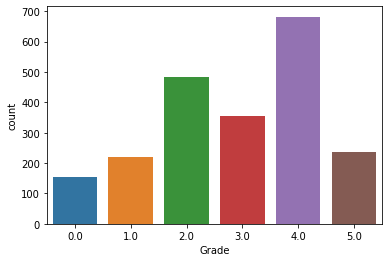

In [11]:
import seaborn as s

s.countplot(x='Grade', data=data)

In [12]:
max_fatures = 5000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Responses'].values)
X = tokenizer.texts_to_sequences(data['Responses'].values)
X = pad_sequences(X,maxlen=100, dtype='int32', value=0)

In [13]:
X.shape

(2131, 100)

In [14]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    8,  142,    9,  791,   31,
         11,   37,  103,  571, 1282,   21, 2023,  106,    1, 1095, 3025,
        669], dtype=int32)

In [38]:
embed_dim = 512
lstm_out = 256

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(lstm_out, dropout=0.6, recurrent_dropout=0.5))
model.add(Dense(6,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 512)          2560000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 100, 512)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 256)               787456    
                                                                 
 dense_3 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 3,348,998
Trainable params: 3,348,998
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
Y=pd.get_dummies(data['Grade']).values
Y

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1917, 100) (1917, 6)
(214, 100) (214, 6)


In [41]:
batch_size = 16
import datetime
init_time = datetime.datetime.now()
history = model.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    )
requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')


Epoch 1/20
120/120 [==============================] - 133s 1s/step - loss: 1.6093 - accuracy: 0.3459
Epoch 2/20
120/120 [==============================] - 129s 1s/step - loss: 1.4722 - accuracy: 0.4011
Epoch 3/20
120/120 [==============================] - 128s 1s/step - loss: 1.2815 - accuracy: 0.4893
Epoch 4/20
120/120 [==============================] - 129s 1s/step - loss: 1.0876 - accuracy: 0.6004
Epoch 5/20
120/120 [==============================] - 131s 1s/step - loss: 0.9313 - accuracy: 0.6625
Epoch 6/20
120/120 [==============================] - 132s 1s/step - loss: 0.7586 - accuracy: 0.7240
Epoch 7/20
120/120 [==============================] - 131s 1s/step - loss: 0.6132 - accuracy: 0.7820
Epoch 8/20
120/120 [==============================] - 128s 1s/step - loss: 0.5031 - accuracy: 0.8299
Epoch 9/20
120/120 [==============================] - 129s 1s/step - loss: 0.4181 - accuracy: 0.8519
Epoch 10/20
120/120 [==============================] - 129s 1s/step - loss: 0.3638 - accura

In [42]:
hist_df = pd.DataFrame(history.history)


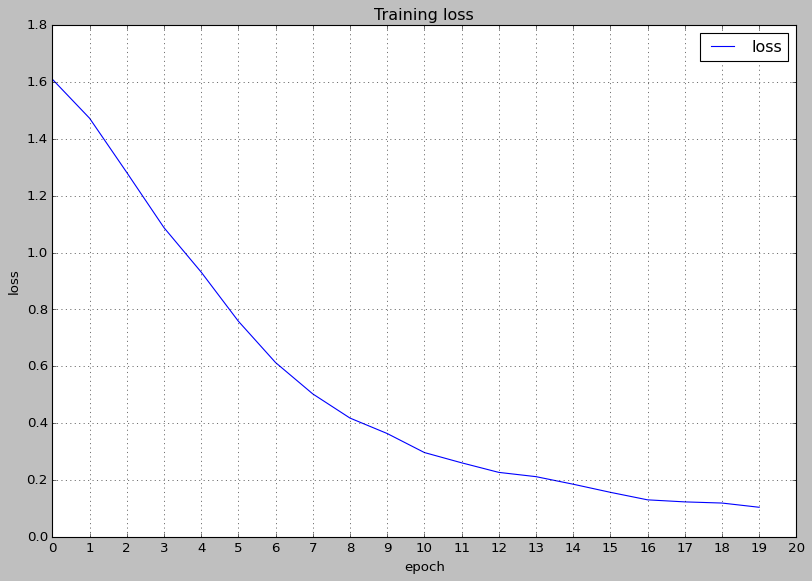

In [43]:
hist_df.plot(y=['loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 21, 1))
plt.show()

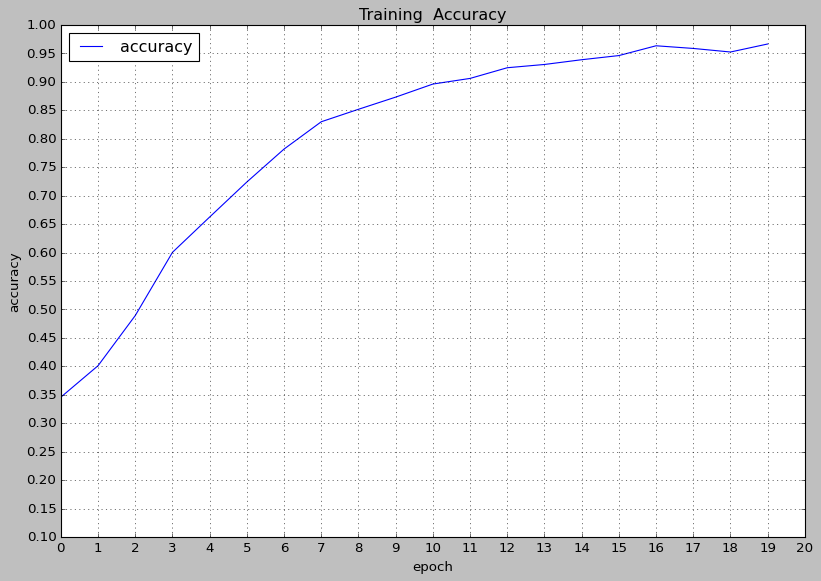

In [44]:
hist_df.plot(y=['accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training  Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0.1, 1.01, 0.05))
plt.show()

In [51]:
loss,acc = model.evaluate(X_test, Y_test, verbose = 1 ,batch_size = batch_size)
print('\naccuracy: {}%'.format(round(acc*100,2)), '\nloss: {:0.4f}'.format(loss))

14/14 [==============================] - 2s 165ms/step - loss: 0.5104 - accuracy: 0.8505

accuracy: 85.05% 
loss: 0.5104


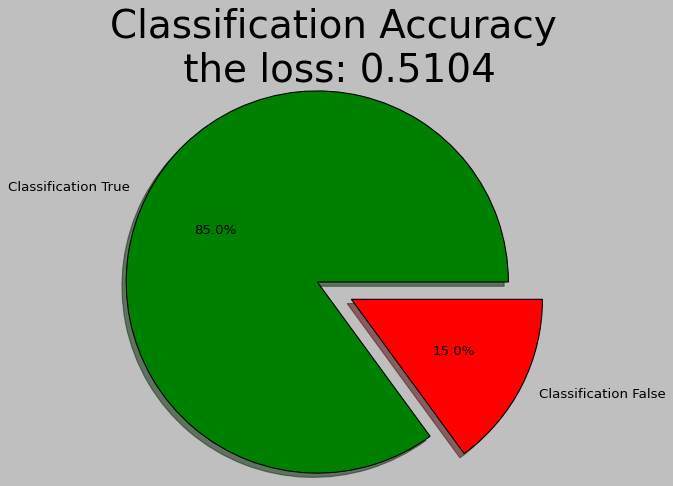

In [52]:
plt.style.use('classic')
plt.pie([acc,1-acc],labels=('Classification True','Classification False')
        ,explode=[0.1,0.1],autopct="%1.1f%%",shadow=True,colors=['green','red'])
plt.axis('equal')
plt.title('Classification Accuracy\n the loss: {:0.4f}'.format(loss),fontsize=35)
plt.show()

In [53]:
answer = ['تتم باختراق نظام الشركة او بطرق اخرى و التجسس بغرض سرقة افكار و معلومات عن منتوج ما و بعد ذلك يسبق الشركة و ينتجه ثم يبيعه']
answer = tokenizer.texts_to_sequences(answer)
answer = pad_sequences(answer, maxlen=100, dtype='int32', value=0)
print(answer)
rate = model.predict(answer,batch_size=1,verbose = 1)
print(rate)
## 3
if(np.argmax(rate) == 0):
    print("F")
elif (np.argmax(rate) == 1):
    print("D")
elif (np.argmax(rate) == 2):
    print("C")
elif (np.argmax(rate) == 3):
    print("B")
elif (np.argmax(rate) == 4):
    print("A")
elif (np.argmax(rate) == 5):
    print("A+")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  235  264   48  383   22  266  585    1   64 1205
    12 1295    1   30   11 2580   39    1   90   54 4598  383    1 4599
   454 4600]]
1/1 [==============================] - 0s 102ms/step
[[1.2522184e-04 3.2459633e-04 3.5086190e-03 9.9332315e-01 2.0400423e-03
  6.7840668e-04]]
B


In [54]:
answer = ['زيادة مستخدمي الأنترنت، سهولة وجود برمجيات تسمح بإختراق حاسوب المستخدم دون أي معرفة في البرمجة و وجود دروس تسمح بتعلم البرمجة و القرصنة، التطور التكنولوجي السريع.']
answer = tokenizer.texts_to_sequences(answer)
answer = pad_sequences(answer, maxlen=100, dtype='int32', value=0)
print(answer)
rate = model.predict(answer,batch_size=1,verbose = 1)
print(rate)
## 5
if(np.argmax(rate) == 0):
    print("F")
elif (np.argmax(rate) == 1):
    print("D")
elif (np.argmax(rate) == 2):
    print("C")
elif (np.argmax(rate) == 3):
    print("B")
elif (np.argmax(rate) == 4):
    print("A")
elif (np.argmax(rate) == 5):
    print("A+")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   78  332  578  280  153  516  807
   654  875   53   71  121   83    4 1176    1  153  807 1176    1  836
  1080  569]]
1/1 [==============================] - 0s 135ms/step
[[0.00893682 0.02202006 0.01474292 0.08603872 0.8333391  0.03492237]]
A


In [55]:
answer = ['الفيروسات يقترن لنشأ نفسها على برامج أخرى و الدود يتسلل داخل الأنظمة للخراب']
answer = tokenizer.texts_to_sequences(answer)
answer = pad_sequences(answer, maxlen=100, dtype='int32', value=0)
print(answer)
rate = model.predict(answer,batch_size=1,verbose = 1)
print(rate)
## 0
if(np.argmax(rate) == 0):
    print("F")
elif (np.argmax(rate) == 1):
    print("D")
elif (np.argmax(rate) == 2):
    print("C")
elif (np.argmax(rate) == 3):
    print("B")
elif (np.argmax(rate) == 4):
    print("A")
elif (np.argmax(rate) == 5):
    print("A+")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   33 570 238   2  16 226   1  99 895  79]]
1/1 [==============================] - 0s 139ms/step
[[0.07044499 0.6075599  0.23638044 0.02417925 0.03159583 0.02983955]]
D


In [56]:
answer = ['هي سلوك غير قانوني يحمل باستعمال الأجهزة الالكترونية لإحداث ضرر مادي او معنوي للضحية']
answer = tokenizer.texts_to_sequences(answer)
answer = pad_sequences(answer, maxlen=100, dtype='int32', value=0)
print(answer)
rate = model.predict(answer,batch_size=1,verbose = 1)
print(rate)
## 3
if(np.argmax(rate) == 0):
    print("F")
elif (np.argmax(rate) == 1):
    print("D")
elif (np.argmax(rate) == 2):
    print("C")
elif (np.argmax(rate) == 3):
    print("B")
elif (np.argmax(rate) == 4):
    print("A")
elif (np.argmax(rate) == 5):
    print("A+")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    8  142    9   74  624  269   95   47 3026 1558  397   22
  1283  669]]
1/1 [==============================] - 0s 115ms/step
[[0.00137136 0.00192533 0.04759767 0.9353736  0.01191513 0.001817  ]]
B
